In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

exact_polytopes = True
folder_name = "m_4_r_3"
base_path = "data/"


def find_filename():
    i = 1
    while True:
        file_name = "run" + str(i)
        if not os.path.exists("./runs/" + file_name + ".csv"):
            return i-1
        i += 1
        

run_id = find_filename()
run_id_prev_1 = run_id - 1
run_id_prev_2 = run_id - 2
run_id_prev_3 = run_id - 3
run_id_prev_4 = run_id - 4

print("Run ID: ", run_id)

Run ID:  10


In [8]:
file_name = "/exact_politopes" if exact_polytopes else "/all_politopes"

x = np.load(base_path + folder_name + file_name + "_x.npy", allow_pickle=True)
y = np.load(base_path + folder_name + file_name+ "_y.npy", allow_pickle=True)

run = pd.read_csv("./runs/run" + str(run_id) + ".csv")
if run_id_prev_1 > 0:
    prev_run = pd.read_csv("./runs/run" + str(run_id_prev_1) + ".csv")
    
if run_id_prev_2 > 0:
    prev_run_2 = pd.read_csv("./runs/run" + str(run_id_prev_2) + ".csv")
    
if run_id_prev_3 > 0:
    prev_run_3 = pd.read_csv("./runs/run" + str(run_id_prev_3) + ".csv")

if run_id_prev_4 > 0:
    prev_run_4 = pd.read_csv("./runs/run" + str(run_id_prev_4) + ".csv")


print("Mean: ", np.mean(y))
print("Std: ", np.std(y))
print("Std squared: ", np.mean(np.std(y)**2))

Mean:  251.6313172081867
Std:  144.3172390842364
Std squared:  20827.465496896653


In [9]:
"""y_cut = y#[:1000]
y_cut = y_cut.astype(float)

n_items = round(50/5)
frequency = np.zeros(n_items)
for y_item in range(len(y_cut)):
    frequency[round(y_cut[y_item]/5)- 1] += 1



df_y_grouped = pd.DataFrame([range(n_items), frequency], index=["y", "frequency"]).T
df_y_grouped.to_csv("data/" + folder_name + "/y_grouped.csv")

figure2, ax2 = plt.subplots(2, 1, figsize=(12, 10))
sns.lineplot(data=df_y_grouped, x="y", y="frequency", ax=ax2[0])
sns.lineplot(data=df_y_grouped[df_y_grouped["y"]< 200], x="y", y="frequency", ax=ax2[1])

plt.show()
"""

'y_cut = y#[:1000]\ny_cut = y_cut.astype(float)\n\nn_items = round(50/5)\nfrequency = np.zeros(n_items)\nfor y_item in range(len(y_cut)):\n    frequency[round(y_cut[y_item]/5)- 1] += 1\n\n\n\ndf_y_grouped = pd.DataFrame([range(n_items), frequency], index=["y", "frequency"]).T\ndf_y_grouped.to_csv("data/" + folder_name + "/y_grouped.csv")\n\nfigure2, ax2 = plt.subplots(2, 1, figsize=(12, 10))\nsns.lineplot(data=df_y_grouped, x="y", y="frequency", ax=ax2[0])\nsns.lineplot(data=df_y_grouped[df_y_grouped["y"]< 200], x="y", y="frequency", ax=ax2[1])\n\nplt.show()\n'

In [10]:
"""#Group y in values of 10
y_cut = y #[:1000]

df_y_grouped = pd.DataFrame([y_cut], index=["y"]).T

figure2, ax2 = plt.subplots(1, 1, figsize=(8, 5))
sns.boxplot(data=df_y_grouped, y="y", ax=ax2)
ax2.set_yscale('log')

plt.show()"""

'#Group y in values of 10\ny_cut = y #[:1000]\n\ndf_y_grouped = pd.DataFrame([y_cut], index=["y"]).T\n\nfigure2, ax2 = plt.subplots(1, 1, figsize=(8, 5))\nsns.boxplot(data=df_y_grouped, y="y", ax=ax2)\nax2.set_yscale(\'log\')\n\nplt.show()'

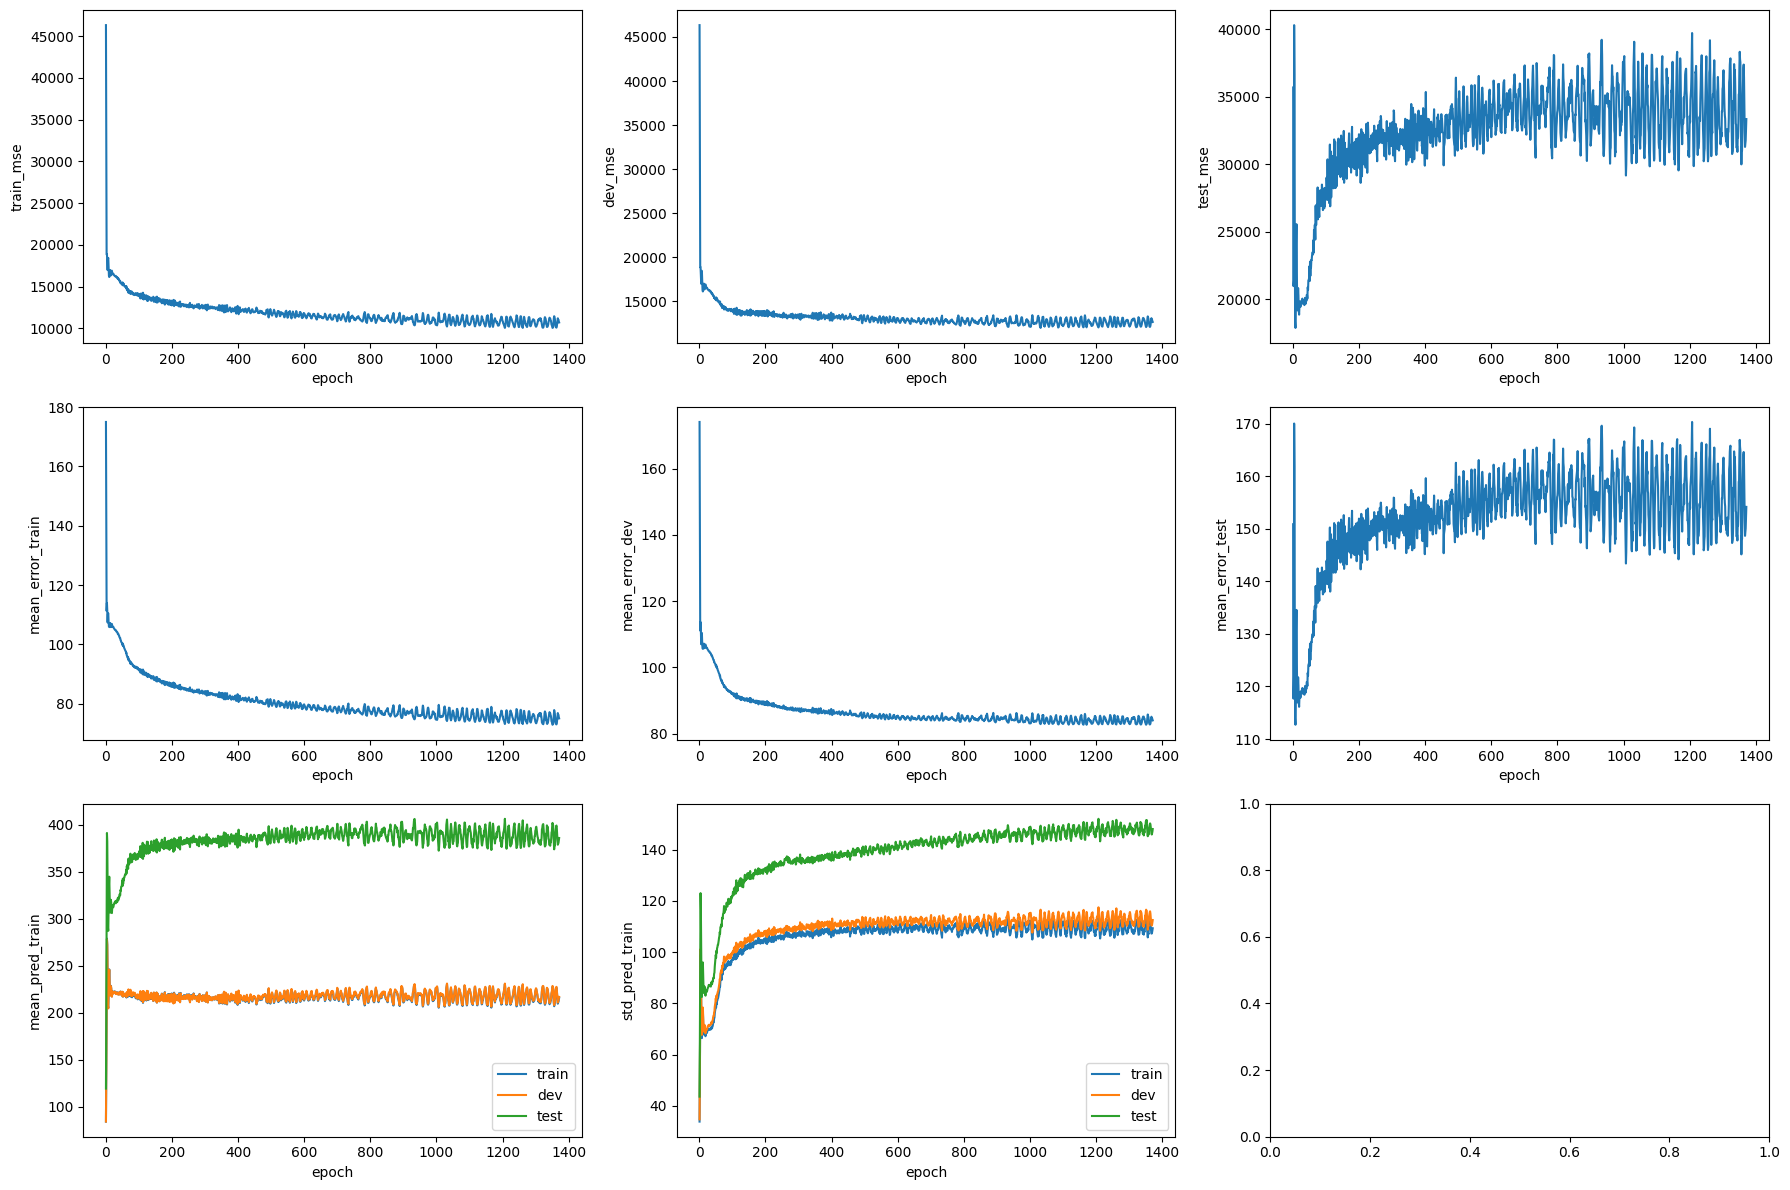

In [11]:

figure2, ax2 = plt.subplots(3, 3, figsize=(18, 12))

sns.lineplot(data=run, x="epoch", y="train_mse", ax=ax2[0, 0])
sns.lineplot(data=run, x="epoch", y="dev_mse", ax=ax2[0, 1])
sns.lineplot(data=run, x="epoch", y="test_mse", ax=ax2[0, 2])


sns.lineplot(data=run, x="epoch", y="mean_error_train", ax=ax2[1, 0])
sns.lineplot(data=run, x="epoch", y="mean_error_dev", ax=ax2[1, 1])
sns.lineplot(data=run, x="epoch", y="mean_error_test", ax=ax2[1, 2])

sns.lineplot(data=run, x="epoch", y="mean_pred_train", ax=ax2[2, 0], label="train")
sns.lineplot(data=run, x="epoch", y="mean_pred_dev", ax=ax2[2, 0], label="dev")
sns.lineplot(data=run, x="epoch", y="mean_pred_test", ax=ax2[2, 0], label="test")

sns.lineplot(data=run, x="epoch", y="std_pred_train", ax=ax2[2, 1], label="train")
sns.lineplot(data=run, x="epoch", y="std_pred_dev", ax=ax2[2, 1], label="dev")
sns.lineplot(data=run, x="epoch", y="std_pred_test", ax=ax2[2, 1], label="test")

figure2.tight_layout()



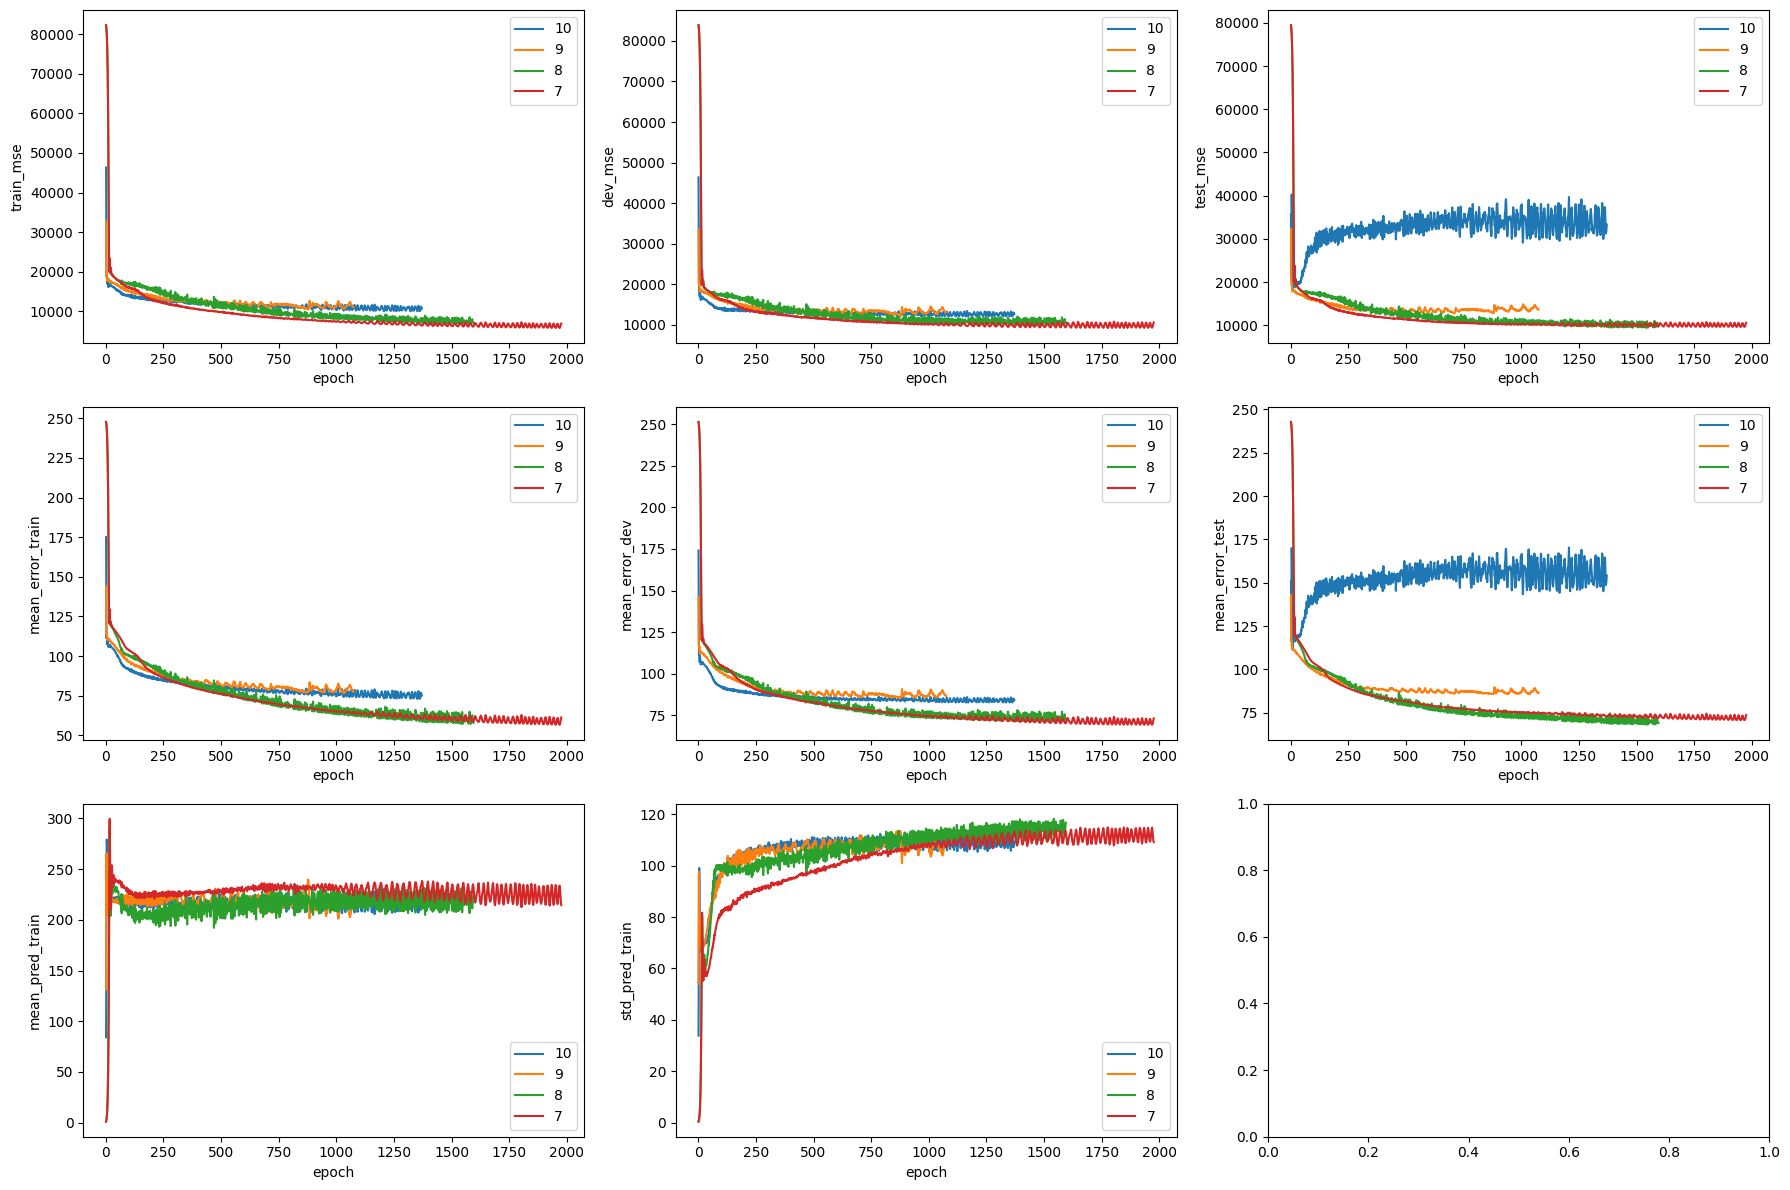

In [12]:
figure2, ax2 = plt.subplots(3, 3, figsize=(18, 12))

sns.lineplot(data=run, x="epoch", y="train_mse", ax=ax2[0, 0], label=run_id)
sns.lineplot(data=run, x="epoch", y="dev_mse", ax=ax2[0, 1], label=run_id)
sns.lineplot(data=run, x="epoch", y="test_mse", ax=ax2[0, 2], label=run_id)

run_id_prev_4 = 0
#run_id_prev_3 = 0
#run_id_prev_2 = 0

if run_id_prev_1 > 0:
    sns.lineplot(data=prev_run, x="epoch", y="train_mse", ax=ax2[0, 0], label=run_id_prev_1)
    sns.lineplot(data=prev_run, x="epoch", y="dev_mse", ax=ax2[0, 1], label=run_id_prev_1)
    sns.lineplot(data=prev_run, x="epoch", y="test_mse", ax=ax2[0, 2], label=run_id_prev_1)
if run_id_prev_2 > 0:
    sns.lineplot(data=prev_run_2, x="epoch", y="train_mse", ax=ax2[0, 0], label=run_id_prev_2)
    sns.lineplot(data=prev_run_2, x="epoch", y="dev_mse", ax=ax2[0, 1], label=run_id_prev_2)
    sns.lineplot(data=prev_run_2, x="epoch", y="test_mse", ax=ax2[0, 2], label=run_id_prev_2)
if run_id_prev_3 > 0:
    sns.lineplot(data=prev_run_3, x="epoch", y="train_mse", ax=ax2[0, 0], label=run_id_prev_3)
    sns.lineplot(data=prev_run_3, x="epoch", y="dev_mse", ax=ax2[0, 1], label=run_id_prev_3)
    sns.lineplot(data=prev_run_3, x="epoch", y="test_mse", ax=ax2[0, 2], label=run_id_prev_3)
if run_id_prev_4 > 0:
    sns.lineplot(data=prev_run_4, x="epoch", y="train_mse", ax=ax2[0, 0], label=run_id_prev_4)
    sns.lineplot(data=prev_run_4, x="epoch", y="dev_mse", ax=ax2[0, 1], label=run_id_prev_4)
    sns.lineplot(data=prev_run_4, x="epoch", y="test_mse", ax=ax2[0, 2], label=run_id_prev_4)



sns.lineplot(data=run, x="epoch", y="mean_error_train", ax=ax2[1, 0], label=run_id)
sns.lineplot(data=run, x="epoch", y="mean_error_dev", ax=ax2[1, 1], label=run_id)
sns.lineplot(data=run, x="epoch", y="mean_error_test", ax=ax2[1, 2], label=run_id)
if run_id_prev_1 > 0:
    sns.lineplot(data=prev_run, x="epoch", y="mean_error_train", ax=ax2[1, 0], label=run_id_prev_1)
    sns.lineplot(data=prev_run, x="epoch", y="mean_error_dev", ax=ax2[1, 1], label=run_id_prev_1)
    sns.lineplot(data=prev_run, x="epoch", y="mean_error_test", ax=ax2[1, 2], label=run_id_prev_1)
    
if run_id_prev_2 > 0:
    sns.lineplot(data=prev_run_2, x="epoch", y="mean_error_train", ax=ax2[1, 0], label=run_id_prev_2)
    sns.lineplot(data=prev_run_2, x="epoch", y="mean_error_dev", ax=ax2[1, 1], label=run_id_prev_2)
    sns.lineplot(data=prev_run_2, x="epoch", y="mean_error_test", ax=ax2[1, 2], label=run_id_prev_2)

if run_id_prev_3 > 0:
    sns.lineplot(data=prev_run_3, x="epoch", y="mean_error_train", ax=ax2[1, 0], label=run_id_prev_3)
    sns.lineplot(data=prev_run_3, x="epoch", y="mean_error_dev", ax=ax2[1, 1], label=run_id_prev_3)
    sns.lineplot(data=prev_run_3, x="epoch", y="mean_error_test", ax=ax2[1, 2], label=run_id_prev_3)
    
if run_id_prev_4 > 0:
    sns.lineplot(data=prev_run_4, x="epoch", y="mean_error_train", ax=ax2[1, 0], label=run_id_prev_4)
    sns.lineplot(data=prev_run_4, x="epoch", y="mean_error_dev", ax=ax2[1, 1], label=run_id_prev_4)
    sns.lineplot(data=prev_run_4, x="epoch", y="mean_error_test", ax=ax2[1, 2], label=run_id_prev_4)


sns.lineplot(data=run, x="epoch", y="mean_pred_train", ax=ax2[2, 0], label=run_id)
if run_id_prev_1 > 0:
    sns.lineplot(data=prev_run, x="epoch", y="mean_pred_train", ax=ax2[2, 0], label=run_id_prev_1)
if run_id_prev_2 > 0:
    sns.lineplot(data=prev_run_2, x="epoch", y="mean_pred_train", ax=ax2[2, 0], label=run_id_prev_2)
if run_id_prev_3 > 0:
    sns.lineplot(data=prev_run_3, x="epoch", y="mean_pred_train", ax=ax2[2, 0], label=run_id_prev_3)
if run_id_prev_4 > 0:
    sns.lineplot(data=prev_run_4, x="epoch", y="mean_pred_train", ax=ax2[2, 0], label=run_id_prev_4)


sns.lineplot(data=run, x="epoch", y="std_pred_train", ax=ax2[2, 1], label=run_id)
if run_id_prev_1 > 0:
    sns.lineplot(data=prev_run, x="epoch", y="std_pred_train", ax=ax2[2, 1], label=run_id_prev_1)
if run_id_prev_2 > 0:
    sns.lineplot(data=prev_run_2, x="epoch", y="std_pred_train", ax=ax2[2, 1], label=run_id_prev_2)
if run_id_prev_3 > 0:
    sns.lineplot(data=prev_run_3, x="epoch", y="std_pred_train", ax=ax2[2, 1], label=run_id_prev_3)
if run_id_prev_4 > 0:
    sns.lineplot(data=prev_run_4, x="epoch", y="std_pred_train", ax=ax2[2, 1], label=run_id_prev_4)
    
figure2.tight_layout()

